In [1]:
server = "ftp://hmwr829gr.cr.chiba-u.ac.jp/gridded/FD/V20190123"
yyyymm = "202107"
ddhhnn = "221200"
band = "tir"
ch = "01"
ext = "fld.geoss.bz2"
fname = f"{yyyymm}{ddhhnn}.{band}.{ch}.{ext}"
url = f"{server}/{yyyymm}/{band.upper()}/{fname}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.0M  100 27.0M    0     0  6212k      0  0:00:04  0:00:04 --:--:-- 6212k


In [6]:
import numpy as np

cfname = "count2tbb_v103.tgz"
url = f"http://www.cr.chiba-u.jp/databases/GEO/H8_9/FD/{cfname}"
!curl -O $url
!tar zxvf $cfname
_, tbb = np.loadtxt(f"count2tbb_v103/{band}.{ch}", unpack=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1950k  100 1950k    0     0  5975k      0 --:--:-- --:--:-- --:--:-- 5984k
x count2tbb_v103/
x count2tbb_v103/tir.08
x count2tbb_v103/tir.01
x count2tbb_v103/tir.06
x count2tbb_v103/mktable.sh
x count2tbb_v103/tir.07
x count2tbb_v103/tir.09
x count2tbb_v103/.DS_Store
x count2tbb_v103/main20.f90.patch
x count2tbb_v103/grads05.ctl
x count2tbb_v103/grads10.ctl
x count2tbb_v103/count2tbb10.c
x count2tbb_v103/tir.09.H08
x count2tbb_v103/main05.f90
x count2tbb_v103/main10.f90
x count2tbb_v103/mktable4H09.sh
x count2tbb_v103/tir.08.H08
x count2tbb_v103/tir.09.H09
x count2tbb_v103/tir.08.H09
x count2tbb_v103/sir.01
x count2tbb_v103/LUT_H09/
x count2tbb_v103/vis.03
x count2tbb_v103/LUT_H08/
x count2tbb_v103/vis.02
x count2tbb_v103/ext.01
x count2tbb_v103/mktable4H08.sh
x count2tbb_v103/tir.05
x count2tbb_v103/main05.f90.patch
x count2t

### 座標系を定義

In [4]:
import numpy as np
 
lon_min, lon_max = 85, 205
lat_min, lat_max = -60, 60
resolution = 0.02
lon = np.arange(lon_min, lon_max, resolution)
lat = np.arange(lat_max, lat_min, -resolution)

### 等価黒体温度に変換

In [7]:
import bz2
 
n = 6000
with bz2.BZ2File(fname) as bz2file:
   dataDN = np.frombuffer(bz2file.read(), dtype = ">u2").reshape(n, n)
   dataTBB = tbb[dataDN]

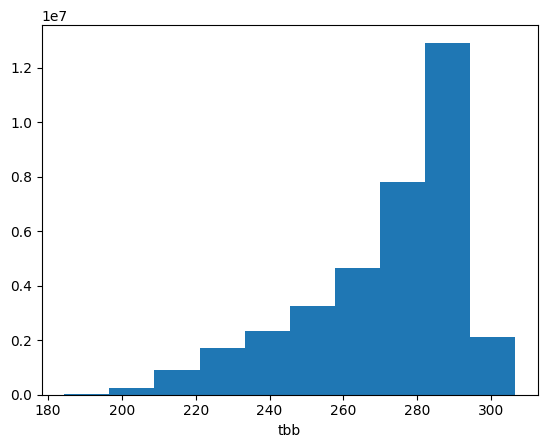

In [9]:
import matplotlib.pyplot as plt
import xarray as xr

xr_tbb = xr.DataArray(np.float32(dataTBB), name="tbb",
                      coords = {
                          'lat':('lat', lat, {'units': 'degrees_north'}),
                          'lon':('lon', lon, {'units': 'degrees_east'})},
                      dims = ['lat', 'lon'])
xr_tbb.plot.hist()
plt.show()

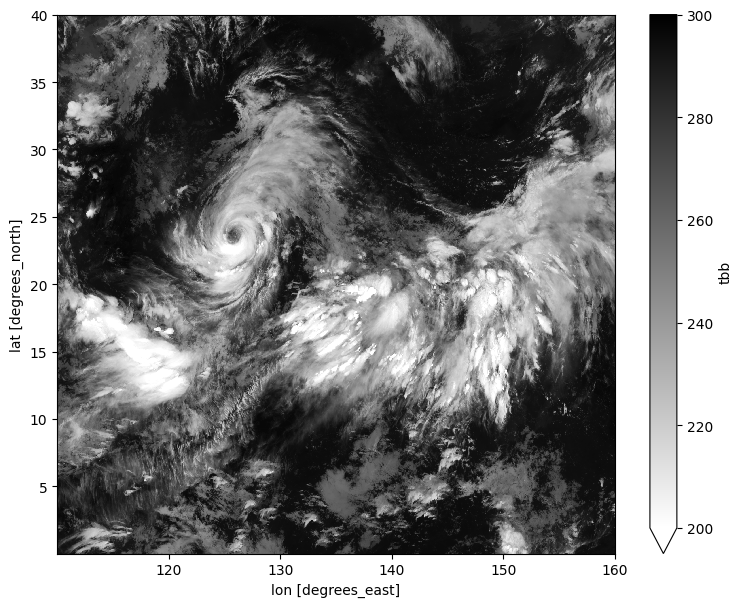

In [10]:
xr_tbb.loc[40:0, 110:160].plot.imshow(vmin=200, vmax=300,
                  interpolation="None", cmap="gray_r", figsize=[9,7])
plt.show()